Generating blobs for model comparsion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from np_perceptron import Perceptron as NpPerceptron, Activation
from sklearn.linear_model import Perceptron as SkPerceptron

data, labels = make_blobs(n_samples=500,
                          n_features=2,
                          centers=([1.1, 3], [4.5, 6.9]),
                          cluster_std=1.3,
                          random_state=0)

Our own perceptron using Numpy

In [ ]:
np_perceptron = NpPerceptron(random_init=True, max_iter=100, activation=Activation.Step)
np_perceptron.fit(data, labels)
np_prediction = np_perceptron.predict(data)
np_accuracy = accuracy_score(labels, np_prediction)
#print(f"Numpy perceptron accuracy: {accuracy:.2f}")

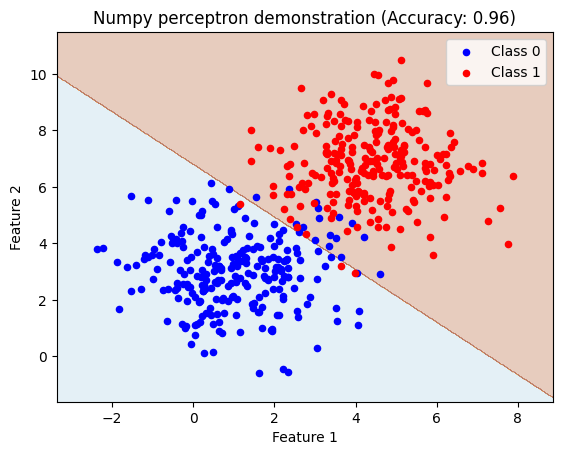

In [ ]:
x1_min, x1_max = data[:, 0].min() - 1, data[:, 0].max() + 1
x2_min, x2_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))

Y = np_perceptron.predict(np.c_[xx1.ravel(), xx2.ravel()])
Y = Y.reshape(xx1.shape)

colors = ('blue', 'red')
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, Y, alpha=0.3, cmap=plt.cm.Paired)
for n_class in range(len(colors)):
    plt.scatter(data[labels == n_class][:, 0],
                data[labels == n_class][:, 1],
                c=colors[n_class],
                s=20,
                label="Class " + str(n_class))
plt.title(f"Numpy perceptron demonstration (Accuracy: {np_accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Perceptron from Sklearn

In [ ]:
sk_perceptron = SkPerceptron(random_state=0, max_iter=100)
sk_perceptron.fit(data, labels)
sk_predictions = np_perceptron.predict(data)
sk_accuracy = accuracy_score(labels, sk_predictions)
#print(f"Sklearn perceptron accuracy: {accuracy:.2f}")

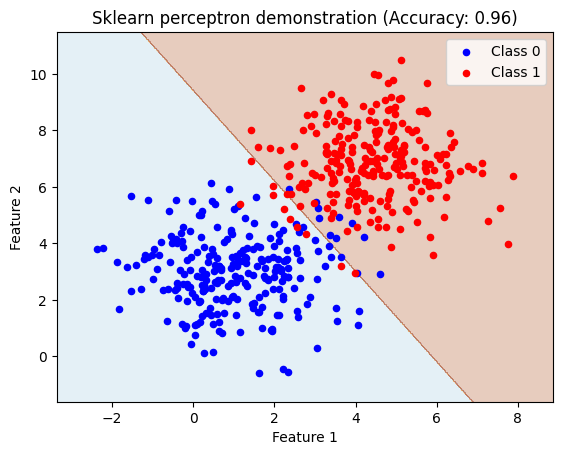

In [ ]:
x1_min, x1_max = data[:, 0].min() - 1, data[:, 0].max() + 1
x2_min, x2_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))

Y = np_perceptron.predict(np.c_[xx1.ravel(), xx2.ravel()])
Y = Y.reshape(xx1.shape)

colors = ('blue', 'red')
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, Y, alpha=0.3, cmap=plt.cm.Paired)
for n_class in range(len(colors)):
    plt.scatter(data[labels == n_class][:, 0],
                data[labels == n_class][:, 1],
                c=colors[n_class],
                s=20,
                label="Class " + str(n_class))
plt.title(f"Sklearn perceptron demonstration (Accuracy: {sk_accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()